In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 

# Short Term Predictions Visualization(March - May all 3 years)

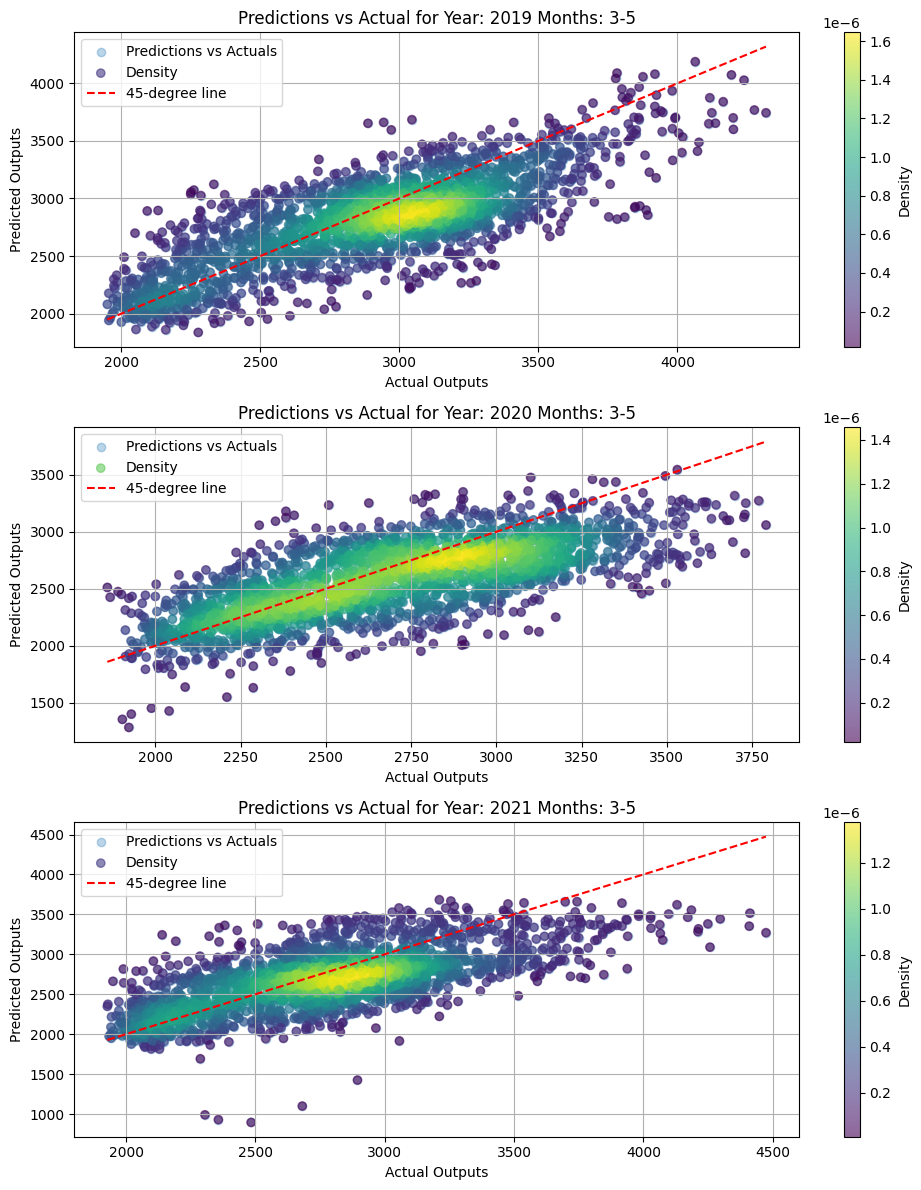

In [20]:
from scipy.stats import gaussian_kde
# Load the data into DataFrames
actuals_short = pd.read_csv("TestingShort/TestingActual_short.csv")
predictions_short = pd.read_csv("TestingShort/TestingPredictionsShort.csv")
# Extract dates from the column headers
actuals_short.columns = pd.to_datetime(
    actuals_short.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
predictions_short.columns = pd.to_datetime(
    predictions_short.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
# Filter columns for dates between March and May over three years
valid_months = [3, 4, 5]
valid_years = [2019, 2020, 2021]
filtered_columns = [
    col for col in actuals_short.columns if col.month in valid_months and col.year in valid_years
]
# Subset the data
filtered_actuals_short = actuals_short[filtered_columns]
filtered_predictions_short = predictions_short[filtered_columns]
# Function to create combined scatter and density plots for each month
def plot_monthly_comparison_with_density(actuals, predictions, months, years):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
    idx = 0 
    
    for year in years:
        all_actuals = []
        all_predictions = []
    
        for month in months:
            # Filter columns for the specific month and year
            filtered_cols = [col for col in actuals.columns if col.month == month and col.year == year]
            monthly_actuals = actuals[filtered_cols].values.flatten()
            monthly_predictions = predictions[filtered_cols].values.flatten()
                
            # Remove NaN values
            mask = ~np.isnan(monthly_actuals) & ~np.isnan(monthly_predictions)
            monthly_actuals = monthly_actuals[mask]
            monthly_predictions = monthly_predictions[mask]
                
            # Accumulate data for the overall scatter plot
            all_actuals.extend(monthly_actuals)
            all_predictions.extend(monthly_predictions)
        
        all_actuals = np.array(all_actuals)
        all_predictions = np.array(all_predictions)
        
        # Create scatter plot
        scatter = axes[idx].scatter(all_actuals, all_predictions, alpha=0.3, label="Predictions vs Actuals")
        
        # Add density-based scatter plot if applicable
        if len(all_actuals) > 1 and len(all_predictions) > 1:
            xy = np.vstack([all_actuals, all_predictions])
            density = gaussian_kde(xy)(xy)
            scatter = axes[idx].scatter(all_actuals, all_predictions, c=density, cmap='viridis', alpha=0.6, label="Density")
            
            # Add a color bar for the density plot
            cbar = fig.colorbar(scatter, ax=axes[idx])
            cbar.set_label("Density")
        
        # Add a 45-degree line
        if len(all_actuals) > 0 and len(all_predictions) > 0:
            axes[idx].plot([all_actuals.min(), all_actuals.max()],
                           [all_actuals.min(), all_actuals.max()],
                           color='red', linestyle='--', label="45-degree line")
        
        # Labels and title
        axes[idx].set_xlabel("Actual Outputs")
        axes[idx].set_ylabel("Predicted Outputs")
        axes[idx].set_title("Predictions vs Actual for Year: {} Months: {}-{}".format(year, months[0], months[-1]))
        axes[idx].legend()
        axes[idx].grid(True)
        
        idx += 1
    
    plt.tight_layout()
    plt.show()
# Generate combined plots for March, April, and May
plot_monthly_comparison_with_density(filtered_actuals_short, filtered_predictions_short, [3, 4, 5], [2019,2020,2021])

# Long Term Predictions Visualization(March - May all 3 years)

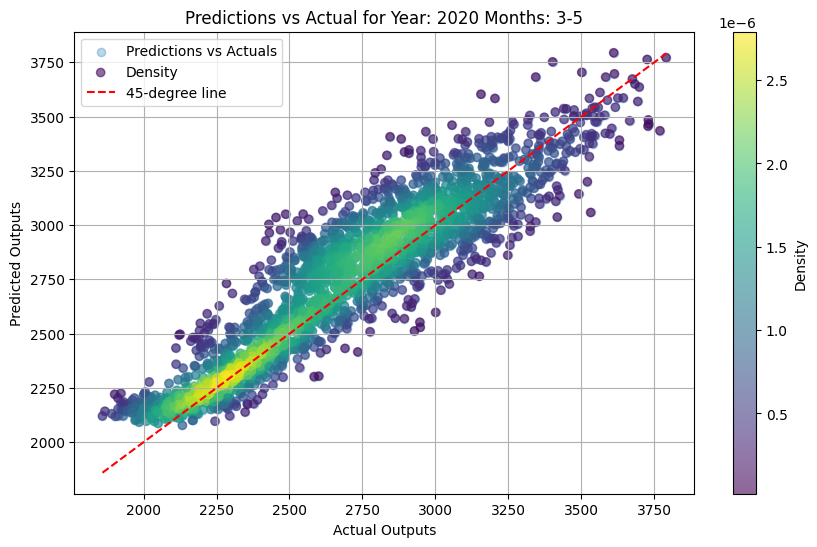

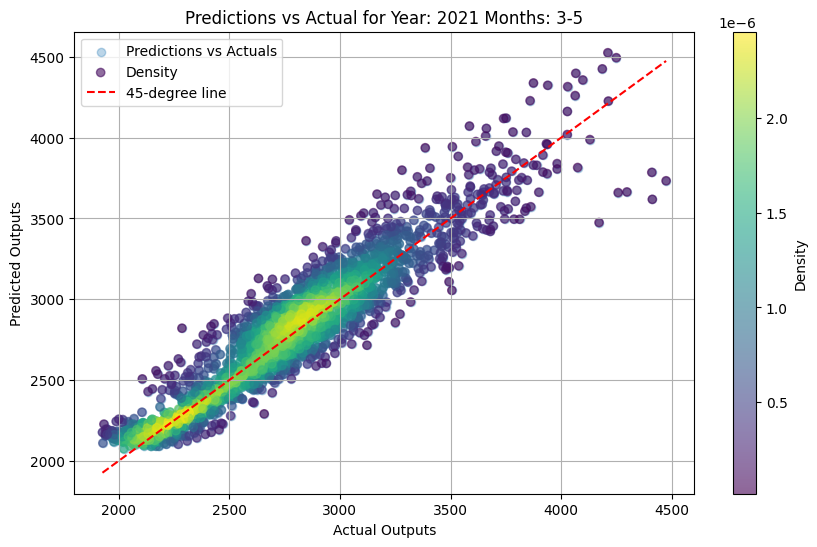

In [3]:
actuals_long = pd.read_csv("TestingLong/TestingActual_long.csv")
predictions_long = pd.read_csv("TestingLong/TestingPredictionsLong.csv")
# Extract dates from the column headers
actuals_long.columns = pd.to_datetime(
    actuals_long.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
predictions_long.columns = pd.to_datetime(
    predictions_long.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)

valid_months = [3, 4, 5]
valid_years = [2020, 2021]
filtered_columns = [
    col for col in actuals_long.columns if col.month in valid_months and col.year in valid_years
]

filtered_actuals_long = actuals_long[filtered_columns]
filtered_predictions_long = predictions_long[filtered_columns]


valid_months = [3, 4, 5]
valid_years = [2020, 2021]
filtered_columns = [
    col for col in actuals_long.columns if col.month in valid_months and col.year in valid_years
]

# Subset the data
filtered_actuals_long = actuals_long[filtered_columns]
filtered_predictions_long = predictions_long[filtered_columns]

for year in valid_years:
    plot_monthly_comparison_with_density(filtered_actuals_long, filtered_predictions_long, valid_months, year)


# Calculate the R^{2} coefficient for short and long term: 

In [4]:
print(valid_years)

[2020, 2021]


In [9]:
from sklearn.metrics import r2_score

# Function to calculate R^2 for each month across the specified years
def calculate_r2(actuals, predictions, months, year):
    all_actuals = []
    all_predictions = []
    
    for month in months:
        # Filter data for the specific month and year
        filtered_cols = [col for col in actuals.columns if col.month == month and col.year == year]
        monthly_actuals = actuals[filtered_cols].values.flatten()
        monthly_predictions = predictions[filtered_cols].values.flatten()
        # Remove NaN values
        mask = ~np.isnan(monthly_actuals) & ~np.isnan(monthly_predictions)
        monthly_actuals = monthly_actuals[mask]
        monthly_predictions = monthly_predictions[mask]
        
        # Accumulate data for the overall calculation
        all_actuals.extend(monthly_actuals)
        all_predictions.extend(monthly_predictions)
    all_actuals = np.array(all_actuals)
    all_predictions = np.array(all_predictions)
    return r2_score(all_actuals, all_predictions)
r2_scores = {}

short_years = [2019,2020,2021] 
months = [3,4,5]

for year in short_years: 
    r2_scores[year] = calculate_r2(filtered_actuals_short, filtered_predictions_short, months, year) # calculate the r2 score for each year. 
# Display the R^2 scores for each month
print("Short Term R^2 coefficient:")
r2_scores

Short Term R^2 coefficient:


{2019: 0.5698305556181115, 2020: 0.3816524657356861, 2021: 0.38690140609017376}

In [10]:
r2_scores = {}
long_years = [2020,2021]
for year in long_years:
    r2_scores[year] = calculate_r2(filtered_actuals_long, filtered_predictions_long, months, year)
# Display the R^2 scores for each month
print("Long Term R^2 coefficient:")
r2_scores

Long Term R^2 coefficient:


{2020: 0.8201638895593042, 2021: 0.8793688043300858}